# Step 1: Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image 
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
skin_CD = pd.read_csv("HAM10000_metadata.csv")

In [3]:
skin_CD

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

# Step 2:Making Dictionary of images and labels

In [4]:
project_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('C:/Users/Mitej/HAM10000/','*','*.jpg'))}

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Step 3:Reading and Processing Data

In [6]:
skin_CD = pd.read_csv(os.path.join('C:/Users/Mitej/HAM10000/','C:/Users/Mitej/HAM10000/HAM10000_metadata.csv'))

In [7]:
skin_CD['route'] = skin_CD['image_id'].map(project_path_dict.get)
skin_CD['skin_type'] = skin_CD['dx'].map(lesion_type_dict.get) 
skin_CD['skin_type_idx'] = pd.Categorical(skin_CD['skin_type']).codes

In [8]:
skin_CD.head(n = 10)

lesion_id      image_id   dx dx_type   age     sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear   
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear   
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face   
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face   
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back   
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back   

                                               route  \
0  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
1  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
2  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
3  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
4  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
5  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
6  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
7  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
8  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
9  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   

                        skin_type  skin_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2  
5  Benign keratosis-like lesions               2  
6  Benign keratosis-like lesions               2  
7  Benign keratosis-like lesions               2  
8  Benign keratosis-like lesions               2  
9  Benign keratosis-like lesions               2

In [9]:
skin_CD.tail(n = 10)

lesion_id      image_id     dx dx_type   age     sex  \
10005  HAM_0005579  ISIC_0028393  akiec   histo  80.0    male   
10006  HAM_0004034  ISIC_0024948  akiec   histo  55.0  female   
10007  HAM_0001565  ISIC_0028619  akiec   histo  60.0  female   
10008  HAM_0001576  ISIC_0033705  akiec   histo  60.0    male   
10009  HAM_0005705  ISIC_0031430  akiec   histo  75.0  female   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female   

          localization                                              route  \
10005             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
10006             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
10007             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
10008             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10009  lower extremity  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10010          abdomen  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10011          abdomen  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10012          abdomen  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10013             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10014             back  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   

               skin_type  skin_type_idx  
10005  Actinic keratoses              0  
10006  Actinic keratoses              0  
10007  Actinic keratoses              0  
10008  Actinic keratoses              0  
10009  Actinic keratoses              0  
10010  Actinic keratoses              0  
10011  Actinic keratoses              0  
10012  Actinic keratoses              0  
10013  Actinic keratoses              0  
10014           Melanoma              5

# Step 4: Data Cleaning

In [10]:
skin_CD.shape

(10015, 10)

In [11]:
print(skin_CD.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
route             object
skin_type         object
skin_type_idx       int8
dtype: object


In [12]:
skin_CD.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
route             0
skin_type         0
skin_type_idx     0
dtype: int64

In [13]:
skin_CD['age'].fillna((skin_CD['age'].mean()), inplace=True)

In [14]:
skin_CD.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
route            0
skin_type        0
skin_type_idx    0
dtype: int64

# Step 5: Explotary Data Analysis

In [15]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sex', 'Localisation', 'Age', 'Skin Type'],
                    vertical_spacing=0.15,
                    column_widths=[0.4, 0.6])

fig.add_trace(go.Bar(
            x=skin_CD['sex'].value_counts().index, 
            y=skin_CD['sex'].value_counts()),
            row=1, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['localization'].value_counts().index, 
            y=skin_CD['localization'].value_counts()),
            row=1, col=2)
fig.add_trace(go.Histogram(
            x=skin_CD['age']),
            row=2, col=1)
fig.add_trace(go.Bar(
            x=skin_CD['dx'].value_counts().index.map(lesion_type_dict.get), 
            y=skin_CD['dx'].value_counts()),
            row=2, col=2)


for i in range(4):
    fig.update_yaxes(title_text='Count', row=i//2+1, col=i%2+1)
fig.update_layout(title='Distribution of Data', height=800)

fig.show()

Text(0.5, 1.0, 'Diagnosis Test Type: Distribution Plot')

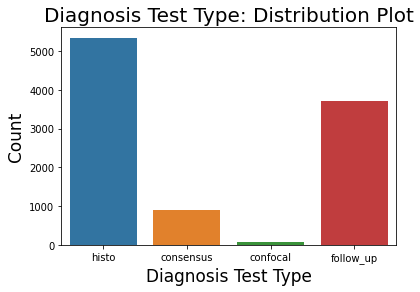

In [16]:
sns.countplot(x = "dx_type", data = skin_CD)
plt.xlabel("Diagnosis Test Type", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.title("Diagnosis Test Type: Distribution Plot", fontsize=20)

# Step 6:Oversampling

In [17]:
skin_CD.skin_type_idx.value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: skin_type_idx, dtype: int64

In [18]:
class_4,class_5,class_2,class_1,class_0,class_6,class_3 = skin_CD.skin_type_idx.value_counts()

skin_class_0 = skin_CD[skin_CD['skin_type_idx'] == 0]
skin_class_1 = skin_CD[skin_CD['skin_type_idx'] == 1]
skin_class_2 = skin_CD[skin_CD['skin_type_idx'] == 2]
skin_class_3 = skin_CD[skin_CD['skin_type_idx'] == 3]
skin_class_4 = skin_CD[skin_CD['skin_type_idx'] == 4]
skin_class_5 = skin_CD[skin_CD['skin_type_idx'] == 5]
skin_class_6 = skin_CD[skin_CD['skin_type_idx'] == 6]

In [19]:
class_0,class_1,class_2,class_3,class_4,class_5,class_6

(327, 514, 1099, 115, 6705, 1113, 142)

In [20]:
skin_class_0.shape

(327, 10)

In [21]:
skin_class_1.shape

(514, 10)

In [22]:
skin_class_2.shape

(1099, 10)

In [23]:
skin_class_3.shape

(115, 10)

In [24]:
skin_class_4.shape

(6705, 10)

In [25]:
skin_class_5.shape

(1113, 10)

In [26]:
skin_class_6.shape

(142, 10)

In [27]:
skin_class_0_over = skin_class_0.sample(class_4,replace = True)

In [28]:
skin_class_0_over.shape

(6705, 10)

In [29]:
skin_class_1_over = skin_class_1.sample(class_4,replace = True)

In [30]:
skin_class_1_over.shape

(6705, 10)

In [31]:
skin_class_2_over = skin_class_2.sample(class_4,replace = True)

In [32]:
skin_class_2_over.shape

(6705, 10)

In [33]:
skin_class_3_over = skin_class_3.sample(class_4,replace = True)

In [34]:
skin_class_3_over.shape

(6705, 10)

In [35]:
skin_class_5_over = skin_class_5.sample(class_4,replace = True)

In [36]:
skin_class_5_over.shape

(6705, 10)

In [37]:
skin_class_6_over = skin_class_6.sample(class_4,replace = True)

In [38]:
skin_class_6_over.shape

(6705, 10)

In [39]:
skin_CD_test_over = pd.concat([skin_class_0_over,skin_class_1_over,skin_class_2_over,skin_class_3_over
                               ,skin_class_4,skin_class_5_over,skin_class_6_over], axis = 0)

In [40]:
skin_CD_test_over.shape

(46935, 10)

In [41]:
print('Random over-sampling:')
print(skin_CD_test_over.skin_type_idx.value_counts())

Random over-sampling:
0    6705
1    6705
2    6705
3    6705
4    6705
5    6705
6    6705
Name: skin_type_idx, dtype: int64


# Step 7:Loading and Resizing of Images

In [42]:
skin_CD_test_over['image'] = skin_CD_test_over['route'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [43]:
skin_CD_test_over.head()

lesion_id      image_id     dx dx_type   age     sex  \
10005  HAM_0005579  ISIC_0028393  akiec   histo  80.0    male   
9823   HAM_0002771  ISIC_0029059  akiec   histo  80.0  female   
9969   HAM_0004060  ISIC_0030825  akiec   histo  40.0    male   
10001  HAM_0000020  ISIC_0031922  akiec   histo  60.0  female   
9852   HAM_0005650  ISIC_0024522  akiec   histo  65.0    male   

          localization                                              route  \
10005             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
9823   lower extremity  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
9969              face  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
10001             face  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
9852   lower extremity  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   

               skin_type  skin_type_idx  \
10005  Actinic keratoses              0   
9823   Actinic keratoses              0   
9969   Actinic keratoses              0   
10001  Actinic keratoses              0   
9852   Actinic keratoses              0   

                                                   image  
10005  [[[130, 91, 78], [135, 96, 83], [141, 102, 87]...  
9823   [[[218, 187, 185], [217, 187, 185], [219, 191,...  
9969   [[[177, 142, 141], [181, 147, 147], [181, 146,...  
10001  [[[180, 141, 144], [179, 138, 142], [180, 138,...  
9852   [[[154, 108, 101], [156, 109, 97], [159, 114, ...

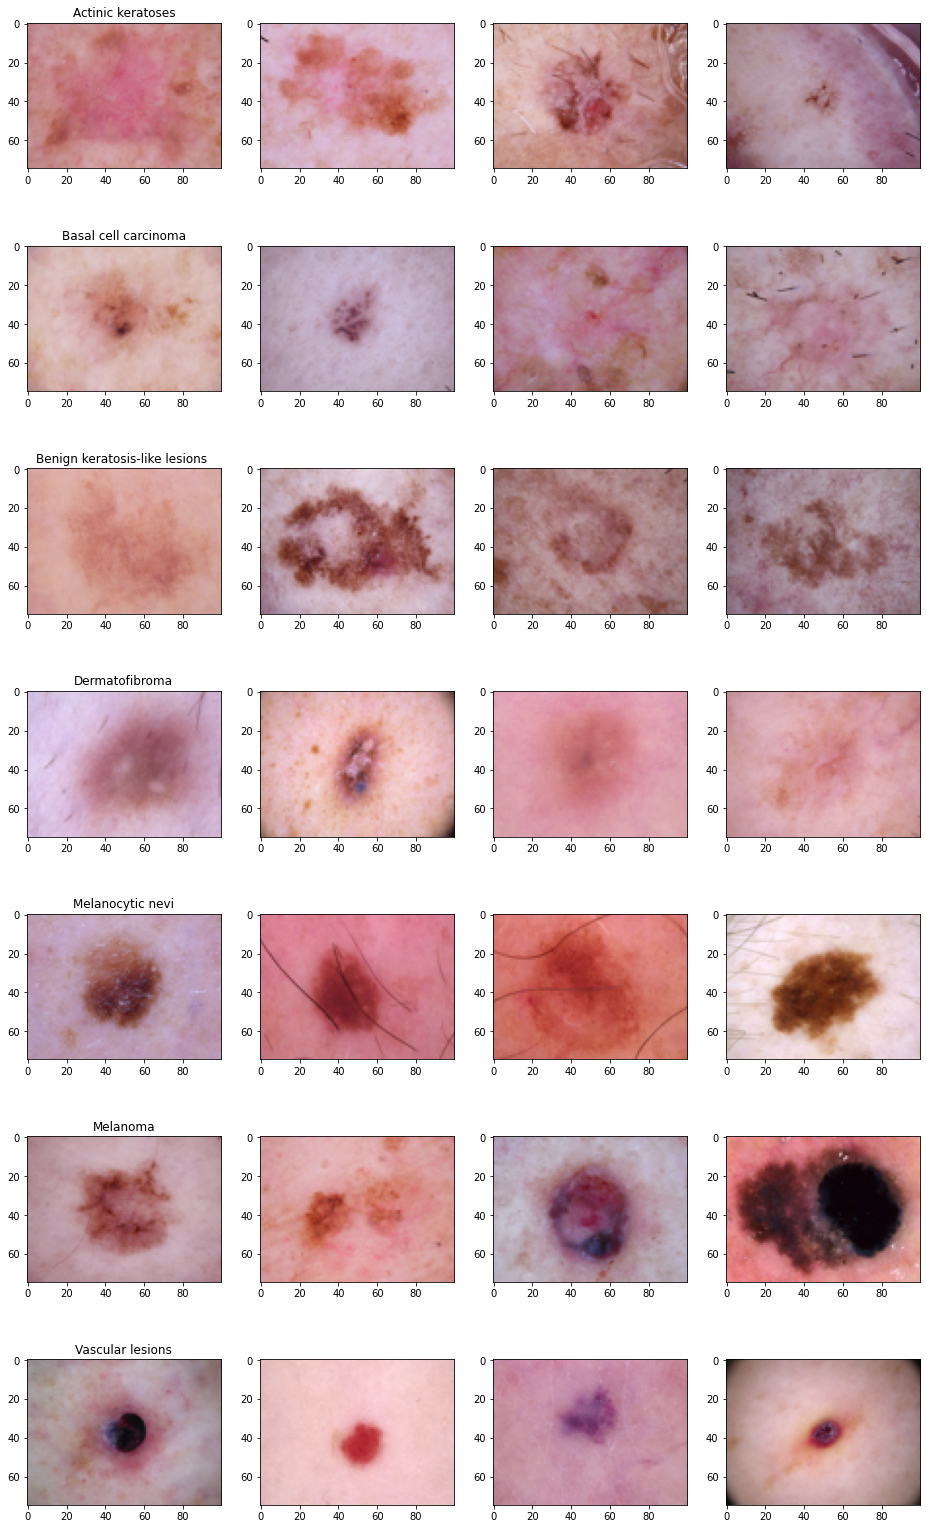

In [44]:
n_samples = 4
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 4*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_CD_test_over.sort_values(['skin_type']).groupby('skin_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('on')
fig.savefig('samples.png', dpi=300)

# Step 8: Selection of Depended and Independed Variables


In [45]:
features=skin_CD_test_over.drop(columns=['skin_type_idx','dx','skin_type'],axis=1)
target=skin_CD_test_over['skin_type_idx']

# Step 9: Train and Test Data Splitting

In [46]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=1234, stratify = target)

In [47]:
x_train.head()

lesion_id      image_id    dx_type   age   sex     localization  \
2426  HAM_0005215  ISIC_0028406  consensus  80.0  male          abdomen   
1868  HAM_0005681  ISIC_0027234      histo  65.0  male  upper extremity   
1643  HAM_0005711  ISIC_0032638      histo  35.0  male             back   
9960  HAM_0002699  ISIC_0029827      histo  60.0  male             back   
6006  HAM_0007143  ISIC_0028841  follow_up  50.0  male  upper extremity   

                                                  route  \
2426  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
1868  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
1643  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
9960  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
6006  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   

                                                  image  
2426  [[[206, 134, 140], [208, 137, 141], [209, 137,...  
1868  [[[8, 4, 8], [8, 5, 7], [9, 5, 7], [9, 5, 7], ...  
1643  [[[27, 15, 22], [41, 25, 35], [56, 34, 43], [6...  
9960  [[[228, 183, 165], [227, 180, 162], [222, 172,...  
6006  [[[236, 145, 157], [234, 145, 155], [237, 148,...

In [48]:
x_test.head()

lesion_id      image_id    dx_type   age     sex     localization  \
2438  HAM_0001780  ISIC_0024370  consensus  55.0    male            trunk   
4925  HAM_0004855  ISIC_0026642  follow_up  50.0    male             back   
2768  HAM_0003135  ISIC_0028107      histo  55.0    male            chest   
9895  HAM_0004976  ISIC_0031421      histo  80.0  female  upper extremity   
33    HAM_0005612  ISIC_0024981      histo  80.0    male            scalp   

                                                  route  \
2438  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
4925  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
2768  C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   
9895  C:/Users/Mitej/HAM10000\HAM10000_images_part_2...   
33    C:/Users/Mitej/HAM10000\HAM10000_images_part_1...   

                                                  image  
2438  [[[205, 130, 136], [206, 133, 137], [207, 132,...  
4925  [[[220, 148, 168], [222, 149, 170], [222, 151,...  
2768  [[[150, 92, 84], [152, 93, 83], [152, 93, 84],...  
9895  [[[142, 121, 122], [142, 121, 123], [145, 128,...  
33    [[[207, 195, 213], [216, 210, 222], [209, 214,...

In [49]:
y_train.value_counts()

6    5364
5    5364
0    5364
4    5364
2    5364
3    5364
1    5364
Name: skin_type_idx, dtype: int64

In [50]:
y_test.value_counts()

6    1341
4    1341
1    1341
0    1341
2    1341
5    1341
3    1341
Name: skin_type_idx, dtype: int64

# Step 10:Normalization

In [51]:
x_train = x_train['image'].tolist()


x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)


x_train = (x_train - x_train_mean)/x_train_std


In [52]:
print('Train min=%.3f, max=%.3f' % (x_train.min(), x_train.max()))

Train min=-3.938, max=2.192


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


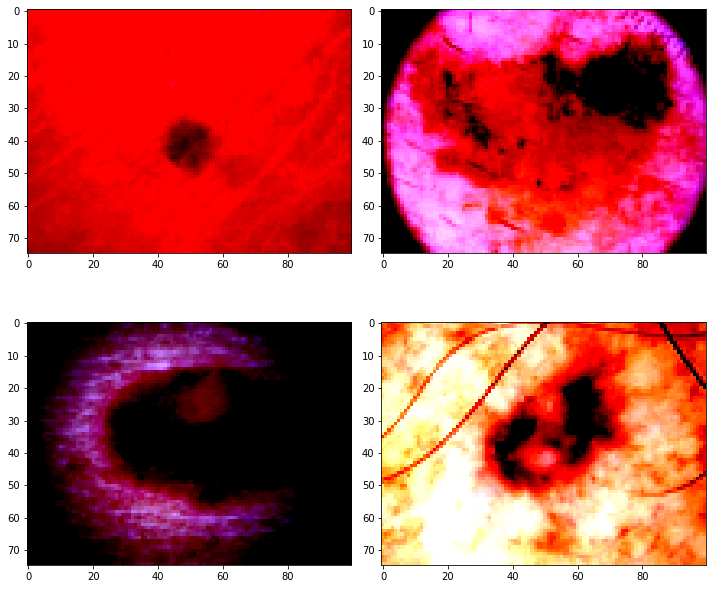

In [53]:
fig, (ax) = plt.subplots(2, 2, figsize = (10, 10))
k = 0 
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_train[k])
        ax[i,j].axis('on')
        k = k + 1  
    plt.tight_layout()

# Step 11: Label Encoding

In [54]:
y_train = to_categorical(y_train, num_classes = 7)
y_test= to_categorical(y_test, num_classes = 7)

In [55]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [56]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


# Step 12: Inception v3 model

In [60]:
from tensorflow.compat.v1.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

input_shape = (75, 100, 3)

num_labels = 7

base_model = InceptionV3(include_top = False, input_shape = input_shape,pooling = 'avg', 
                         weights = 'imagenet')
model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation = 'softmax',kernel_regularizer=regularizers.l2(0.02)))

for layer in base_model.layers:
    layer.trainable = True

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               262272    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 7)                 903       
                                                                 
Total params: 22,065,959
Trainable params: 22,031,527
Non-trainable params: 34,432
_________________________________________________________________


# Step 13:Optimizer,Data Augmentation,Complie,Learning rate reduction

In [61]:
optimizer = Adam (learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=5e-7, amsgrad=False)
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [62]:
y_train = np.argmax(y_train, axis = 1)

In [63]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [64]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(x_train)

# Step 14:Fitting The Model

In [65]:
epochs = 75
batch_size = 64
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs,
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/75
586/586 [==============================] - 1046s 2s/step - loss: 1.9065 - accuracy: 0.6292
Epoch 2/75
586/586 [==============================] - 1008s 2s/step - loss: 0.5353 - accuracy: 0.8762
Epoch 3/75
586/586 [==============================] - 1012s 2s/step - loss: 0.3940 - accuracy: 0.9140
Epoch 4/75
586/586 [==============================] - 1009s 2s/step - loss: 0.3360 - accuracy: 0.9315
Epoch 5/75
586/586 [==============================] - 1004s 2s/step - loss: 0.2922 - accuracy: 0.9437
Epoch 6/75
586/586 [==============================] - 1004s 2s/step - loss: 0.2523 - accuracy: 0.9539
Epoch 7/75
586/586 [==============================] - 1005s 2s/step - loss: 0.2495 - accuracy: 0.9577
Epoch 8/75
586/586 [==============================] - 1006s 2s/step - loss: 0.2229 - accuracy: 0.9617
Epoch 9/75
586/586 [==============================] - 1006s 2s/step - loss: 0.2032 - accuracy: 0.9660
Epoch 10/75
586/586 [==============================] - 1007s 2s/step - loss: 0.191

In [66]:
y_test = np.argmax(y_test, axis = 1)

# Step 15:Model Evaluation and testing

In [67]:
loss, Inception_accuracy = model.evaluate(x_test, y_test_1, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % ( Inception_accuracy, loss))
model.save("model_75_64_Inception.h5")

Test: accuracy = 0.986790  ;  loss = 0.102709


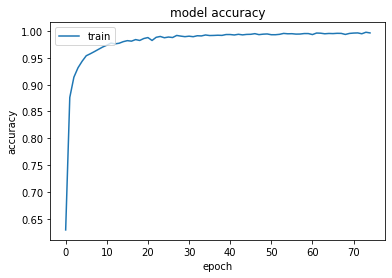

In [68]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

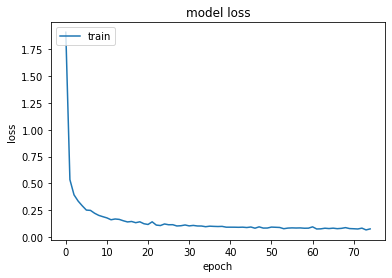

In [69]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [70]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#The number of correct and incorrect predictions are summarized with count values and broken down by each class in a confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification report for classifier <keras.engine.sequential.Sequential object at 0x000002B257F3BA30>:
                                precision    recall  f1-score   support

              Melanocytic nevi       0.99      1.00      0.99      1341
                      Melanoma       1.00      0.99      0.99      1341
Benign keratosis-like lesions        0.98      0.99      0.98      1341
          Basal cell carcinoma       1.00      1.00      1.00      1341
             Actinic keratoses       0.98      0.94      0.96      1341
              Vascular lesions       0.96      0.99      0.98      1341
                Dermatofibroma       1.00      1.00      1.00      1341

                      accuracy                           0.99      9387
                     macro avg       0.99      0.99      0.99      9387
                  weighted avg       0.99      0.99      0.99      9387




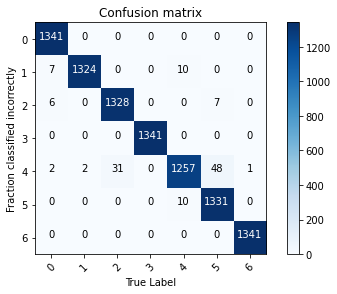

In [76]:
from sklearn import metrics
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = y_test
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

#Show Classification report
target_names = [
    'Melanocytic nevi',
    'Melanoma',
    'Benign keratosis-like lesions ',
    'Basal cell carcinoma',
    'Actinic keratoses',
    'Vascular lesions',
    'Dermatofibroma'
]
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(Y_true, Y_pred_classes, target_names = target_names)))